In [63]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [64]:
## Loading the required libraries:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import datetime as dt
import calendar
from scipy.stats import skew,kurtosis

import warnings
warnings.filterwarnings('ignore')


In [65]:
## Reading the datas:
order_items = pd.read_csv("C:\\Users\\priya\Downloads\\Olist_ProjectData_latest\\olist_order_items_dataset.csv")  
customer=pd.read_csv("C:\\Users\\priya\\Downloads\\Olist_ProjectData_latest\\olist_customers_dataset.csv") 
payment =pd.read_csv("C:\\Users\\priya\\Downloads\\Olist_ProjectData_latest\\olist_order_payments_dataset.csv")  
product = pd.read_csv("C:\\Users\\priya\\Downloads\\Olist_ProjectData_latest\\olist_products_dataset.csv")  
geo=      pd.read_csv("C:\\Users\\priya\\Downloads\\Olist_ProjectData_latest\\olist_geolocation_dataset.csv")  
sellers=pd.read_csv("C:\\Users\\priya\\Downloads\\Olist_ProjectData_latest\\olist_sellers_dataset.csv") 
orders = pd.read_csv("C:\\Users\\priya\\Downloads\\Olist_ProjectData_latest\\olist_orders_dataset.csv")

In [66]:
customer["is_duplicate"]= customer.duplicated()

#customer

In [67]:
#order_items.shape

In [68]:
#payment.shape

In [69]:
#customer.shape

In [70]:
#product.shape

In [71]:
#geo.shape

In [72]:
#orders.shape

In [73]:
#print("Total number of orders in the database:",order_items['order_id'].nunique())
#print("Total Number of customers:",orders['customer_id'].nunique())

In [74]:
status=orders.groupby('order_status')['order_id'].nunique().sort_values(ascending=False)

In [75]:
#status

In [76]:
## Executive Summary:
#print("Maximum order amount is BRL:",payment['payment_value'].max())
#print("Minumum order amount is BRL:",payment['payment_value'].min())
#print("Average order value is BRL:",payment['payment_value'].mean())
#print("Median order value is BRL:",payment['payment_value'].median())

In [77]:
## Joining the order and payment :
order_items_payment=pd.merge(order_items,payment,how="left",on=['order_id','order_id'])

In [78]:
#order_items_payment

In [79]:
value = order_items_payment.groupby('order_id')['payment_value','freight_value'].sum().sort_values(by='payment_value',ascending=False).reset_index()

In [80]:
#value.head()

In [81]:
value = value.dropna()

In [82]:
#value

### Most Bought product categories:

In [83]:
order_items_product=pd.merge(order_items,product,on='product_id',how='left')
#order_items_product.shape

In [84]:
most_product=order_items_product.groupby('product_category_name').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
#most_product.head()

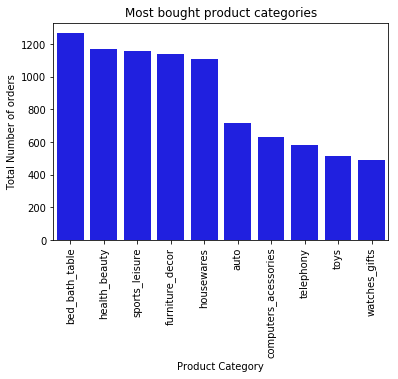

In [85]:
### Visualising top 10 most bought product categories:
sns.barplot(x='product_category_name',y='order_count',data=most_product[:10],color="blue")
plt.xlabel("Product Category")
plt.ylabel("Total Number of orders")
plt.title("Most bought product categories")
plt.xticks(rotation='vertical')
plt.show()

### Order Trend:

In [86]:
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])

In [87]:
## Create new columns for date,day,time,month:
orders['weekday']=orders['order_purchase_timestamp'].dt.weekday_name
orders['year']=orders['order_purchase_timestamp'].dt.year
orders['monthday']=orders['order_purchase_timestamp'].dt.day
orders['weekday'] = orders['order_purchase_timestamp'].dt.weekday
orders['month']=orders['order_purchase_timestamp'].dt.month
orders['hour']=orders['order_purchase_timestamp'].dt.hour

In [88]:
orders_order_items=pd.merge(payment,orders,on='order_id',how='left')

In [89]:
#orders_order_items

Text(0.5, 1.0, 'Transaction Value by Year')

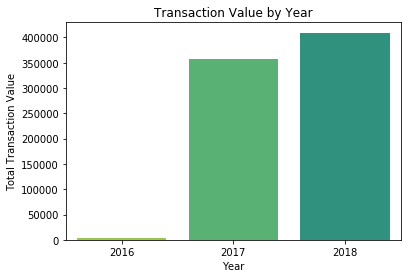

In [90]:
# Trend by Year:
trend_year=pd.DataFrame(orders_order_items.groupby('year')['payment_value'].sum().sort_values(ascending=False)).reset_index()
ax=sns.barplot(x='year',y='payment_value',data=trend_year,palette=sns.set_palette(palette='viridis_r'))
#ax.ticklabel_format()
ax.set_xlabel('Year')
ax.set_ylabel('Total Transaction Value')
ax.set_title('Transaction Value by Year')

The data is available from Sept 2016 to Sept 2018 . Therefore we see a very low sales for the year 2016 .Entire year data is available for 2017 and hence that year is on the higher side whereas sales till Sept for 2018 is plotted.For lack of entire data,we are unable to conclude any significant findings here.

Text(0.5, 1.0, 'Box Plot of transactions over the year')

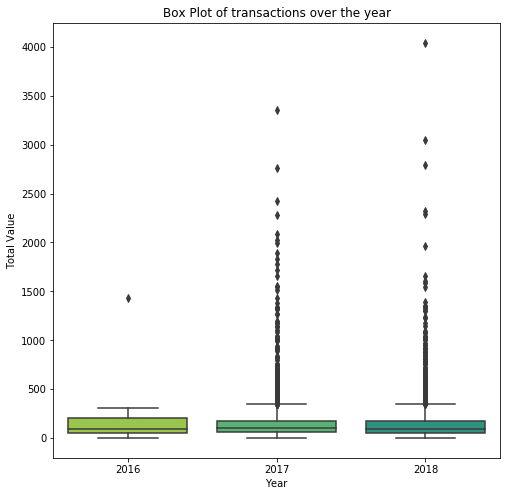

In [91]:
## Boxplot for transactions by year:
plt.figure(figsize=(8,8))
ax=sns.boxplot(x='year',y='payment_value',data=orders_order_items,palette=sns.set_palette(palette='viridis_r'))
ax.set_xlabel('Year')
ax.set_ylabel('Total Value')
ax.set_title('Box Plot of transactions over the year')

We find that most of the transaction fall below BRL 2000 . There are more outliers for the year 2017 ( since there is complete one year data for this).The maximum transaction value has been 14000 . 

### Average value of transactions per month:

Text(0, 0.5, 'Value')

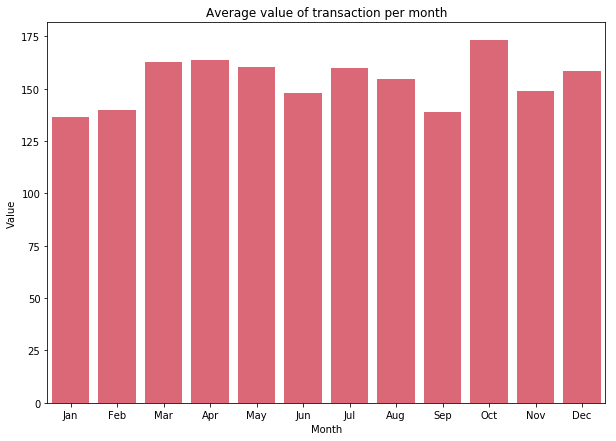

In [92]:
## The below code is inspired from Sbans kernel -https://www.kaggle.com/shivamb/deep-exploration-of-gun-violence-in-us 
trend_month=pd.DataFrame(orders_order_items.groupby('month').agg({'payment_value':'mean'}).rename(columns={'payment_value':'mean_transaction'})).reset_index()
x1 = trend_month.month.tolist()
y1 = trend_month.mean_transaction.tolist()
mapp = {}
for m,v in zip(x1, y1):
    mapp[m] = v
xn = [calendar.month_abbr[int(x)] for x in sorted(x1)]
vn = [mapp[x] for x in sorted(x1)]

plt.figure(figsize=(10,7))
ax=sns.barplot(x=xn,y=vn, color='#ed5569')
ax.set_title("Average value of transaction per month")
ax.set_xlabel('Month')
ax.set_ylabel('Value')

The average value of transaction is highest during the month of October.

### Average value of transaction by day of the week:

In [93]:
trend_weekday=pd.DataFrame(orders_order_items.groupby('weekday').agg({'payment_value':'mean'}).rename(columns={'payment_value':'Mean_Transaction'})).reset_index()

Text(0, 0.5, 'Value')

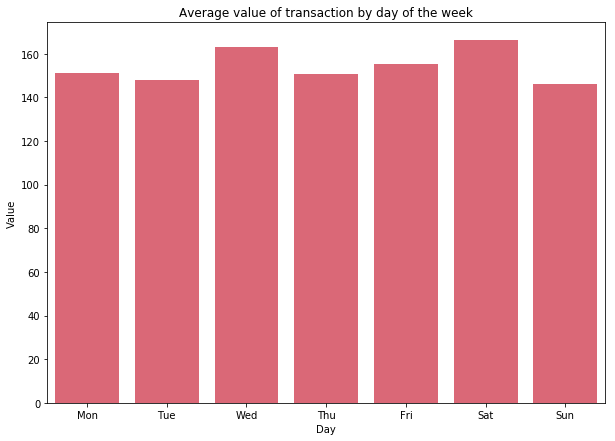

In [94]:
x2 = trend_weekday.index.tolist()
y2 = trend_weekday.Mean_Transaction.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x2 = [weekmap[x] for x in x2]
wkmp = {}
for j,x in enumerate(x2):
    wkmp[x] = y2[j]
order_week = list(weekmap.values())
ordervals = [wkmp[val] for val in order_week]

plt.figure(figsize=(10,7))
ax=sns.barplot(x=order_week,y=ordervals, color='#ed5569')
ax.set_title("Average value of transaction by day of the week")
ax.set_xlabel('Day')
ax.set_ylabel('Value')

There seems to be not much trend observed during the day of the transaction . Lets check the frequency of the orders.

In [95]:
freq_weekday=pd.DataFrame(orders_order_items.groupby('weekday').agg({'order_id':'count'}).rename(columns={'order_id':'order_count'})).reset_index()

Text(0, 0.5, 'Value')

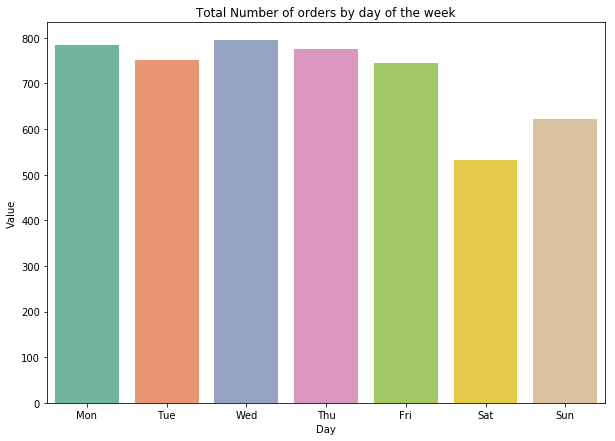

In [96]:
x3 = freq_weekday.index.tolist()
y3 = freq_weekday.order_count.tolist()

weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
x3 = [weekmap[x] for x in x3]
wkmp = {}
for j,x in enumerate(x3):
    wkmp[x] = y3[j]
order_week = list(weekmap.values())
ordervals = [wkmp[val] for val in order_week]

plt.figure(figsize=(10,7))
ax=sns.barplot(x=order_week,y=ordervals, palette=sns.color_palette(palette="Set2"))
ax.set_title("Total Number of orders by day of the week")
ax.set_xlabel('Day')
ax.set_ylabel('Value')

The frequency of the orders has been highest on Wednesday whereas the frequency of orders is low during Saturday and Sundays.This means that during weekend people are not interested in online shopping going only by the frequency of the orders but combining this with the average value of transactions during the day there is a relatively high average value of transaction happening during saturdays compared to other days.

In [97]:
week=pd.merge(trend_weekday,freq_weekday,on='weekday',how='inner')

<Figure size 576x576 with 0 Axes>

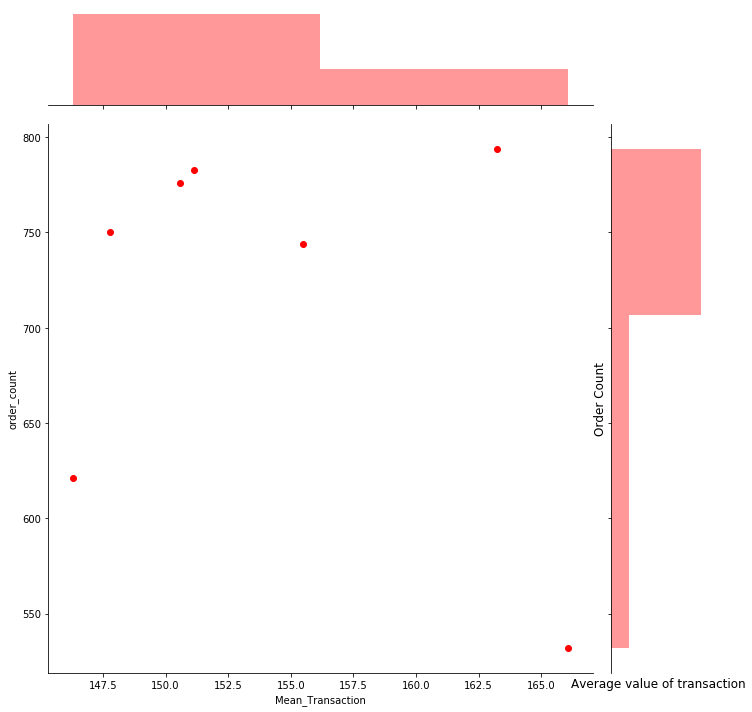

In [98]:
plt.figure(figsize=(8,8))
sns.jointplot(x='Mean_Transaction', y='order_count',data=week, size=10,color='red')
plt.ylabel('Order Count', fontsize=12) 
plt.xlabel('Average value of transaction', fontsize=12)
plt.show()

### Order Trend by hour :

In [99]:
trend_hour=orders_order_items.groupby('hour').agg({'order_id':'count'}).rename(columns={'order_id':'freq_order'}).reset_index()

Text(0.5, 1.0, 'Frequency of transaction over the hour')

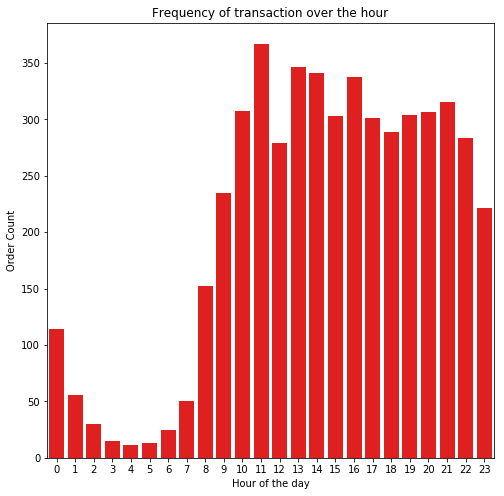

In [100]:
plt.figure(figsize=(8,8))
ax=sns.barplot(x=trend_hour['hour'],y=trend_hour['freq_order'],color="red")
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Order Count')
ax.set_title("Frequency of transaction over the hour")

From the plot we see that the frequency of the order steadly rises as the day progresses and reaches the peak after noon and continues till 22 hrs . There is a dip in the transaction during evening time 19th hr and it sees a rise after that . 

### Frequency of orders during the hour over the day:

In [101]:
day_hour=orders_order_items.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()

In [102]:
day_hour.weekday=day_hour.weekday.map(weekmap)
#day_hour.head()

In [103]:
### Sorting it so that the plot order is correct.
day_hour['weekday']=pd.Categorical(day_hour['weekday'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)

In [104]:
day_hour=day_hour.pivot('weekday','hour','freq')

### City.State and Transaction Value :

In [105]:
trans_state=pd.merge(orders_order_items,customer,on='customer_id',how='left')
#trans_state


In [106]:
transaction=pd.DataFrame(trans_state.groupby('customer_state').agg({'payment_value':'mean'}).rename(columns={'payment_value':'avg_trans'}).sort_values(by='avg_trans',ascending=False)).reset_index()

In [107]:
#transaction

Text(0.5, 1.0, 'Average Transaction Value for each state')

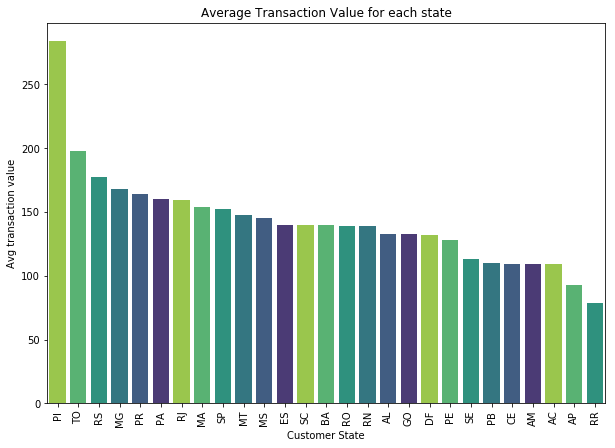

In [108]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='customer_state',y='avg_trans',data=transaction,palette=sns.color_palette(palette="viridis_r"))
ax.set_xlabel('Customer State')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Avg transaction value')
ax.set_title("Average Transaction Value for each state")

States Piauí,Rio Grande do Sul have a higher transaction value whereas Acre, Roraima have the lowest average transaction.

In [109]:
### By City :
trans_city=pd.DataFrame(trans_state.groupby('customer_city').agg({'payment_value':'mean'}).rename(columns={'payment_value':'avg_trans'}).sort_values(by='avg_trans',ascending=False)).reset_index()

In [110]:
#trans_city[:10]

Text(0.5, 1.0, 'Top 10 - Average Transaction Value for each City')

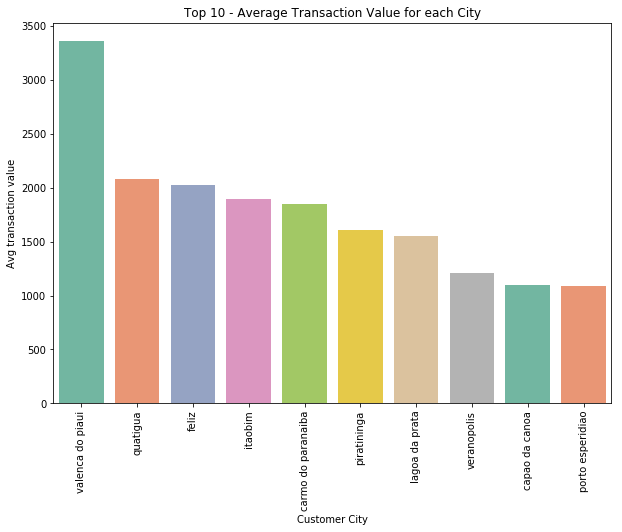

In [111]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='customer_city',y='avg_trans',data=trans_city[:10],palette=sns.color_palette(palette="Set2"))
ax.set_xlabel('Customer City')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Avg transaction value')
ax.set_title("Top 10 - Average Transaction Value for each City")

### Order Delivery :

Lets check the average number of days between order and delivery.

In [112]:
orders['day_to_delivery']=(orders['order_delivered_customer_date']-orders['order_purchase_timestamp']).dt.days

In [113]:
#print("Average days to delivery {}".format(np.round(orders['day_to_delivery'].mean(),0)))

Lets check the overall scenario.

In [114]:
delivery=orders.groupby('day_to_delivery')['order_id'].aggregate({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index().dropna()
delivery['freq']=delivery['freq'].astype(int)

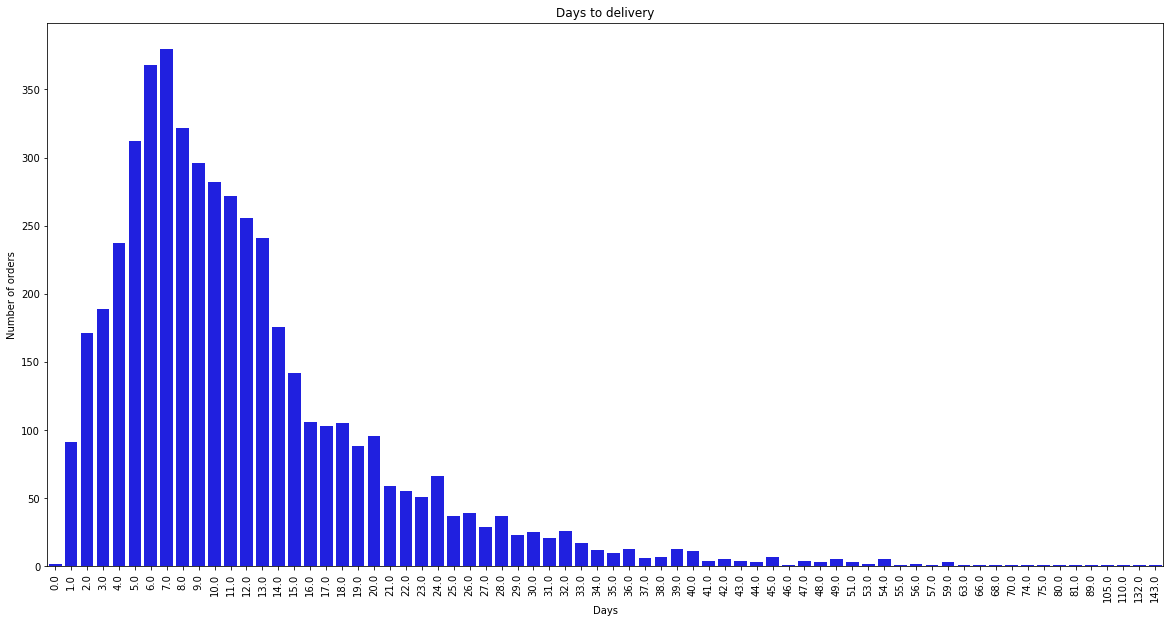

In [115]:
plt.figure(figsize=(20,10))
sns.barplot(x='day_to_delivery',y='freq',data=delivery,color="blue")
plt.title("Days to delivery")
plt.xlabel("Days")
plt.xticks(rotation="vertical")
plt.ylabel("Number of orders")
plt.show()

A majority of the orders are getting delivered within a week whereas there were few orders that is taking over 1.5 months too .

### Payments :

Lets check the mode of payments used for transaction

In [116]:
pay_type=payment.groupby('payment_type').aggregate({'order_id':'count'}).rename(columns={'order_id':'count'}).sort_values(by='count',ascending=False).reset_index()

Text(0, 0.5, 'Number of instances')

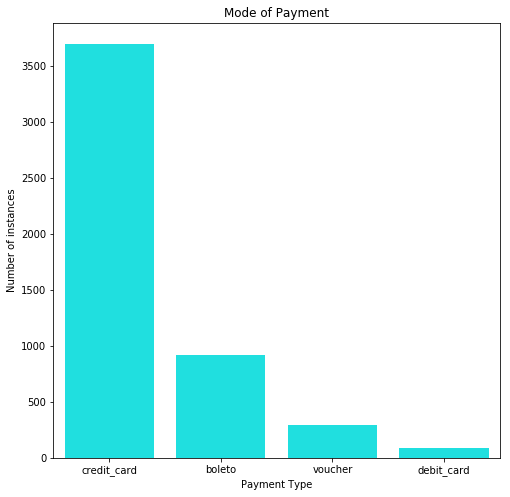

In [117]:
pay_type['perc']=np.round((pay_type['count']/pay_type['count'].sum())*100,2)

plt.figure(figsize=(8,8))
ax=sns.barplot(x='payment_type',y='count',data=pay_type,color='cyan')
plt.title("Mode of Payment")
plt.xlabel('Payment Type')
plt.ylabel('Number of instances')

A large number of online buyers use credit card their prefered mode of payment followed by boleto.According to [wiki](https://en.wikipedia.org/wiki/Boleto) ,boleto is a  a payment method in Brazil regulated by FEBRABAN, short for Brazilian Federation of Banks.A boleto can be paid at ATMs, branch facilities and internet banking of any Bank, Post Office, Lottery Agent and some supermarkets until its due date. After the due date it can only be paid at the issuer bank facilities.

Lets check the average value of transaction used for each type of payment.

In [118]:
#print("Average value of transaction on credit card : BRL {:,.0f}".format(np.mean(payment[payment.payment_type=='credit_card']['payment_value'])))
#print("Average value of transaction on boleto : BRL {:,.0f}".format(np.mean(payment[payment.payment_type=='boleto']['payment_value'])))
#print("Average value of transaction on voucher: BRL {:,.0f}".format(np.mean(payment[payment.payment_type=='voucher']['payment_value'])))
#print("Average value of transaction on debit card: BRL {:,.0f}".format(np.mean(payment[payment.payment_type=='debit_card']['payment_value'])))

In [119]:
#print("Credit Card quantiles")
#print(payment[payment.payment_type=='credit_card']['payment_value'].quantile([.01,.25,.5,.75,.99]))
#print("")
#print("Boleto quantiles")
#print(payment[payment.payment_type=='boleto']['payment_value'].quantile([.01,.25,.5,.75,.99]))
#print("")
#print("Voucher quantiles")
#print(payment[payment.payment_type=='voucher']['payment_value'].quantile([.01,.25,.5,.75,.99]))
#print("")
#print("Debit Card quantiles")
#print(payment[payment.payment_type=='debit_card']['payment_value'].quantile([.01,.25,.5,.75,.99]))

[Text(0, 0, 'credit_card'),
 Text(0, 0, 'boleto'),
 Text(0, 0, 'voucher'),
 Text(0, 0, 'debit_card')]

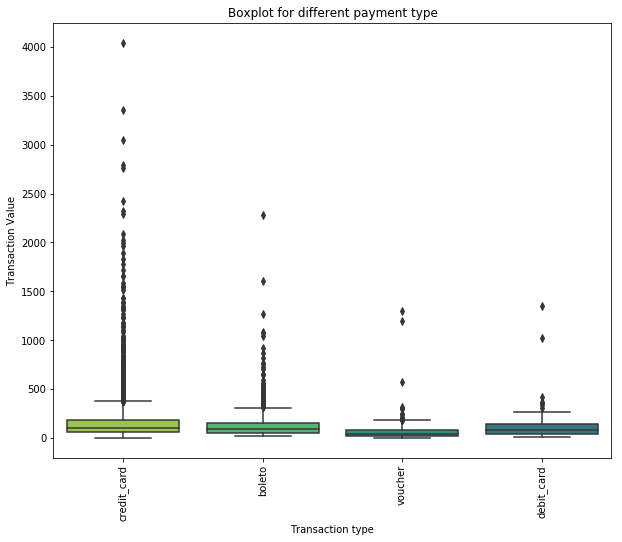

In [120]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x=payment.payment_type,y=payment.payment_value,palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Boxplot for different payment type")
ax.set_xlabel("Transaction type")
ax.set_ylabel("Transaction Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)



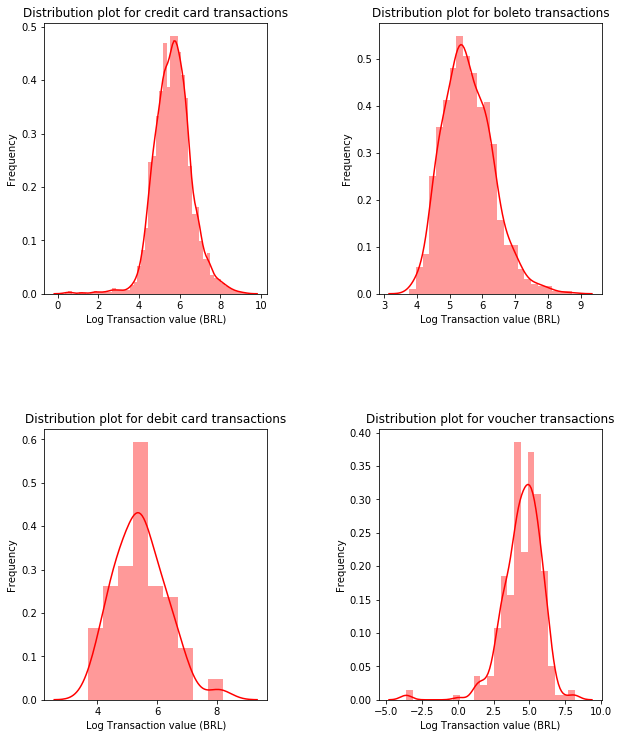

In [121]:
payment=payment[payment['payment_value']!=0]
plt.figure(figsize=(10,8))
plt.subplot(221)
ax=sns.distplot(np.log(payment[payment.payment_type=='credit_card']['payment_value'])+1,color="red")
ax.set_xlabel("Log Transaction value (BRL)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution plot for credit card transactions")
plt.subplot(222)
ax1=sns.distplot(np.log(payment[payment.payment_type=='boleto']['payment_value'])+1,color="red")
ax1.set_xlabel("Log Transaction value (BRL)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution plot for boleto transactions")
plt.subplot(223)
ax2=sns.distplot(np.log(payment[payment.payment_type=='debit_card']['payment_value'])+1,color="red")
ax2.set_xlabel("Log Transaction value (BRL)")
ax2.set_ylabel("Frequency")
ax2.set_title("Distribution plot for debit card transactions")
plt.subplot(224)
ax3=sns.distplot(np.log(payment[payment.payment_type=='voucher']['payment_value'])+1,color="red")
ax3.set_xlabel("Log Transaction value (BRL)")
ax3.set_ylabel("Frequency")
ax3.set_title("Distribution plot for voucher transactions")


plt.subplots_adjust(wspace = 0.5, hspace = 0.5,
                    top = 1.3)

plt.show()

From the distribution & box plot we understand the following

The distribution for credit card type of transaction is nearly normal and from the boxplot it is seen that there are extreme outliers in this case.This means that for higher value of transactions ,people prefer to buy on credit and pay later.
Transaction through boleto is multimodal and seems to be for lesser value of BRL and here too the transactions are dominated by outliers.There seems to be a significant difference between credit card and boleto type of transactions .
Debit card and vouchers are not used much and there are two modes dominating the distribution plot .

### Analysis on Sellers:

In [122]:
### Joining with the transaction data:
order_pay=pd.merge(product,sellers,how='left',on=('seller_id'))
#order_pay.shape

#### Sellers who have sold most number of products:

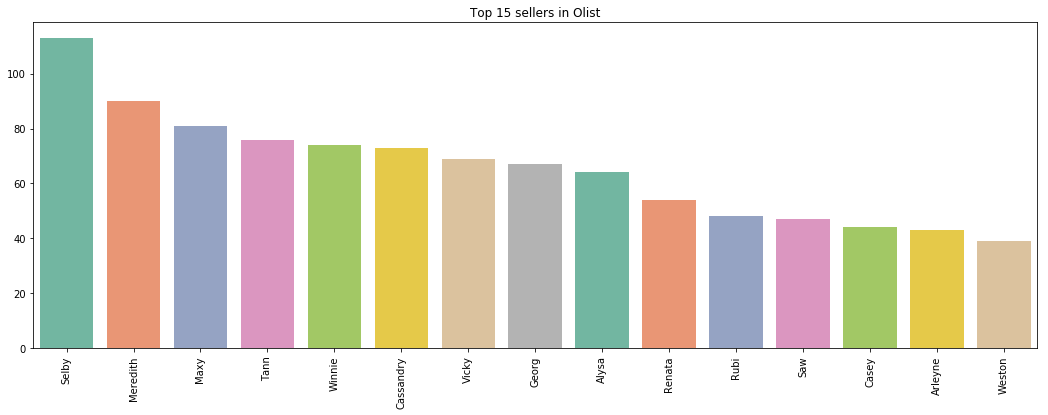

In [123]:
plt.figure(figsize=(18,6))
ax=sns.barplot(order_pay['seller_name'].value_counts()[:15].index,order_pay['seller_name'].value_counts()[:15].values,palette='Set2')
ax.set_title('Top 15 sellers in Olist')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

There are 21 products sold by one seller. Overall the top 15 sellers by product count 13 to 21 products in their portfolio.

This code is referenced from kaggle:
    https://www.kaggle.com/gsdeepakkumar/e-commerce-dataset-analysis